In [1]:
!pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 2.0 MB/s eta 0:00:00


In [2]:
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pylab as plt

import dmba
from dmba import classificationSummary
from dmba import gainsChart, liftChart

DATA = Path('.').resolve().parent / 'data'

Colab environment detected.


### eBay Auctions - Boosting and Bagging
Using the eBay auction data (file _eBayAuctions.csv_ ) with variable Competitive as the outcome variable, partition the data into training (60%) and validation (40%).

In [3]:
ebay_df = dmba.load_data('eBayAuctions.csv')
ebay_df.head()


,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [4]:
# convert categorical variables into indicator and drop the first column of each of them
ebay_df = pd.get_dummies(ebay_df, prefix_sep='_', drop_first=True)

y = ebay_df['Competitive?']
X = ebay_df.drop(columns=['Competitive?'])

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


Run a classification tree, using the default settings of `DecisionTreeClassifier`.


In [5]:
classTree = DecisionTreeClassifier(random_state=1)
classTree.fit(train_X, train_y)

classificationSummary(valid_y, classTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8758)

       Prediction
Actual   0   1
     0 315  38
     1  60 376


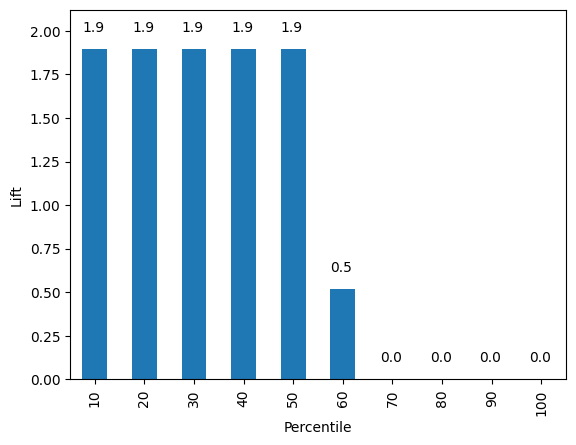

In [6]:
# Create the information for the lift chart
proba = classTree.predict_proba(valid_X)
result = pd.DataFrame({'actual': valid_y,
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': classTree.predict(valid_X) })

df = result.sort_values(by=['p(1)'], ascending=False)
liftChart(df['p(1)'], title=False)
plt.show()

Run a boosted tree with the same predictors (use `AdaBoostClassifier` with `DecisionTreeClassifier`
as the base estimator).


In [13]:
boost = AdaBoostClassifier(n_estimators=100, base_estimator=classTree, random_state=1)
boost.fit(train_X, train_y)

classificationSummary(valid_y, boost.predict(valid_X))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Confusion Matrix (Accuracy 0.8682)

       Prediction
Actual   0   1
     0 308  45
     1  59 377


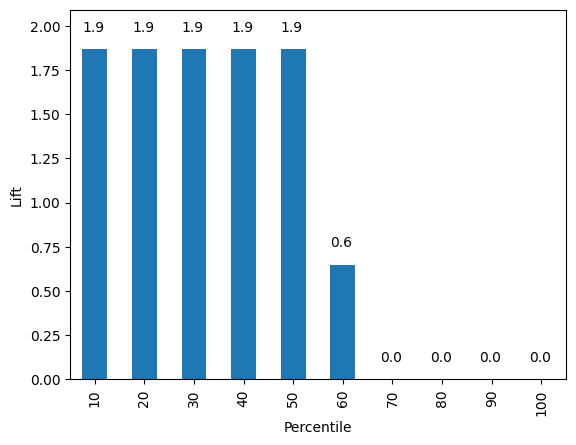

In [8]:
# Create the information for the lift chart
proba = boost.predict_proba(valid_X)
result = pd.DataFrame({'actual': valid_y,
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': boost.predict(valid_X) })

df = result.sort_values(by=['p(1)'], ascending=False)
liftChart(df['p(1)'], title=False)
plt.show()

Run a bagged tree with the same predictors (use `BaggingClassifier`).


In [9]:
bagging = BaggingClassifier(classTree, max_samples=0.5, max_features=0.5, random_state=1)
bagging.fit(train_X, train_y)

classificationSummary(valid_y, bagging.predict(valid_X))

Confusion Matrix (Accuracy 0.7567)

       Prediction
Actual   0   1
     0 262  91
     1 101 335


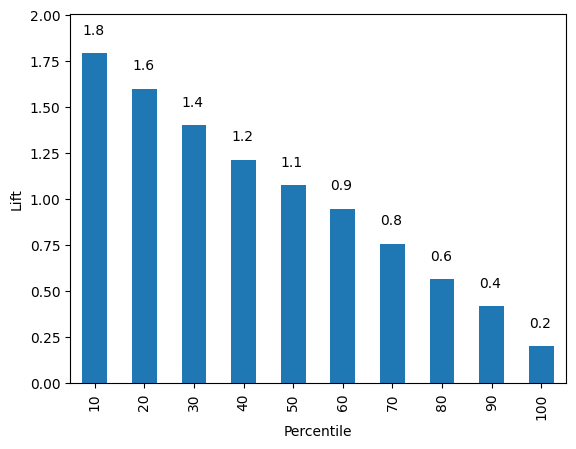

In [10]:
# Create the information for the lift chart
proba = bagging.predict_proba(valid_X)
result = pd.DataFrame({'actual': valid_y,
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': bagging.predict(valid_X) })

df = result.sort_values(by=['p(1)'], ascending=False)
liftChart(df['p(1)'], title=False)
plt.show()

Run a random forest (use `RandomForestClassifier`).

In [11]:
rfModel = RandomForestClassifier(random_state=1, n_estimators=100)
rfModel.fit(train_X, train_y)

classificationSummary(valid_y, rfModel.predict(valid_X))

Confusion Matrix (Accuracy 0.8644)

       Prediction
Actual   0   1
     0 320  33
     1  74 362


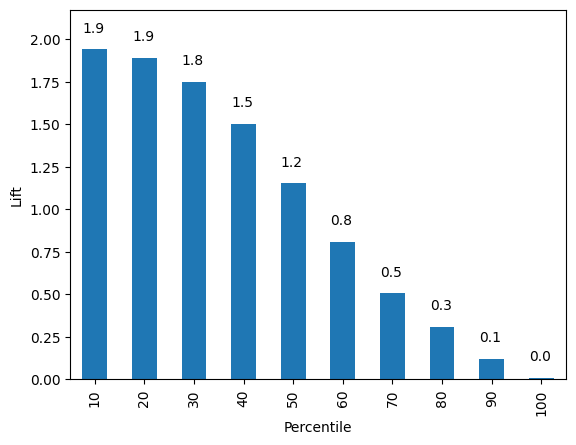

In [12]:
# Create the information for the lift chart
proba = rfModel.predict_proba(valid_X)
result = pd.DataFrame({'actual': valid_y,
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': rfModel.predict(valid_X) })

df = result.sort_values(by=['p(1)'], ascending=False)
liftChart(df['p(1)'], title=False)
plt.show()